In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math 

In [0]:
np.random.seed(21091982)

### 1. load the iris data.

In [0]:
iris_d = sm.datasets.get_rdataset('iris')
iris = iris_d.data
iris.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\datasets\utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
Ind_vars=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]

### 2. scale the indipendent features.

In [0]:
sc = StandardScaler()
sc.fit(Ind_vars)
Ind_vars_std = pd.DataFrame(sc.transform(Ind_vars),columns={'Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'})
Ind_vars_std.head()

,Petal.Width,Petal.Length,Sepal.Width,Sepal.Length
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [0]:
Ind_vars_std.describe()

,Petal.Width,Petal.Length,Sepal.Width,Sepal.Length
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


As we can see, the means of features are almost zero and standard deviations of features are almost 1.

### 3. compute the correlation coefficients and co-variance among all the pair of indipendent features.

In [0]:
Ind_vars_std.corr()

,Petal.Width,Petal.Length,Sepal.Width,Sepal.Length
Petal.Width,1.000000,-0.117570,0.871754,0.817941
Petal.Length,-0.117570,1.000000,-0.428440,-0.366126
Sepal.Width,0.871754,-0.428440,1.000000,0.962865
Sepal.Length,0.817941,-0.366126,0.962865,1.000000


In [0]:
Ind_vars_std.cov()

,Petal.Width,Petal.Length,Sepal.Width,Sepal.Length
Petal.Width,1.006711,-0.118359,0.877604,0.823431
Petal.Length,-0.118359,1.006711,-0.431316,-0.368583
Sepal.Width,0.877604,-0.431316,1.006711,0.969328
Sepal.Length,0.823431,-0.368583,0.969328,1.006711


### 4. compute the PCA and show the principal components (their coefficients) 

First, we can find eigenvaluses to recognize howmany principal components are enough. 

In [0]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(Ind_vars_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [0]:
pd.DataFrame(pca.explained_variance_,columns={'Eigen Values'})

,Eigen Values
0,2.938085
1,0.920165
2,0.147742
3,0.020854


In [0]:
pd.DataFrame(pca.explained_variance_ratio_,columns={'Eigen Values Ratio'})

,Eigen Values Ratio
0,0.729624
1,0.228508
2,0.036689
3,0.005179


According to eigen values 2.938085 and 0.920165It that are more than other two eigenvalues, it seems that just two principal components are enough. 

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Ind_vars_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Eigen values of principal components are:

In [0]:
pd.DataFrame(pca.explained_variance_,columns={'Eigen Values'})

,Eigen Values
0,2.938085
1,0.920165


In [0]:
pd.DataFrame(pca.explained_variance_ratio_,columns={'Eigen Values Ratio'})

,Eigen Values Ratio
0,0.729624
1,0.228508


Eigen vectors of principal components are:

In [0]:
pd.DataFrame((pca.components_).T,columns=['Eigen Vector 1','Eigen Vectors 2'])

,Eigen Vector 1,Eigen Vectors 2
0,0.521066,0.377418
1,-0.269347,0.923296
2,0.580413,0.024492
3,0.564857,0.066942


In [0]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


### 5. compute the correlation coefficient between each original feature and the new features generated by the PCA 

In [0]:
result = pd.concat([Ind_vars_std, principalDf], axis=1, sort=False)
result.corr()[['principal component 1', 'principal component 2']]

,principal component 1,principal component 2
Petal.Width,8.901688e-01,3.608299e-01
Petal.Length,-4.601427e-01,8.827163e-01
Sepal.Width,9.915552e-01,2.341519e-02
Sepal.Length,9.649790e-01,6.399985e-02
principal component 1,1.000000e+00,3.864388e-16
principal component 2,3.864388e-16,1.000000e+00


The correlation coefficient between principal component 1 and principal component 2 is zero.  

Score; 10

# Question 2 (5 pts + (5 pts Extra))

1. What you can observe by comparing the results in Question1 of the point 4 and 5?
2. Can you define any property?
3. If there is any property are you able to formally prove it? (5 extra pts)


### 1. What you can observe by comparing the results in Question1 of the point 4 and 5?

According to correlation coefficient, the principal component 1 is related with all features, however, principal component 2 is more related with with Sepal.Length and Sepal.Width. Meanwhile, The correlation coefficient between principal component 1 and principal component 2 is zero.  

### 2. Can you define any property?

Correlation of PCs with original variables is the property that we can define. Correlation coefficient between variable $X_i$ and principal component $Y_j$ is given by

\begin{equation*} 
r = a_{(ik)} \frac{St. dev.(Y_k)}{St. dev.(X_i)} =a_{ik}(\frac{\lambda_k}{\sigma_{ii}})^\frac{1}{2}
\end{equation*}

where $\nu_{ij}$ is an $i_{th}$ element of the $j_{th}$ unit-length eigenvector of the covariance matrix.

We can prove it. The correlations $\rho(x_i;y_k)$ of the $k_{th}$ PC with variable $x_i$ are an aid to interpreting the PCs. 

Since $y = A^T (x-\mu)$ we have 

\begin{equation*}
Cov(x;y) = E[(x-\mu)y^T]
= E[(x-\mu)(x-\mu)^TA] = \Sigma A
\end{equation*}

and from the spectral decomposition

\begin{equation*}
\Sigma A=(A\Lambda A^T)A
= A\Lambda 
\end{equation*}

Post-multiplying $A$ by a diagonal matrix $\Lambda $ has the effect of scaling its columns, so that

\begin{equation*}
Cov(x_i;y_k) = \lambda_k a_{ik}
\end{equation*}

is the covariance between the $i^{th}$ variable and the $k^{th}$ PC.

The correlation between $x_i;y_k$ is

\begin{equation*}
\mu (x_i,y_k) = \frac{Cov(x_i;y_k)}{Var(x_i)Var(y_k)}= \frac{\lambda_k a_{ik}}{\sqrt{\sigma_{ii}}\sqrt{\lambda_k}}=a_{ik}(\frac{\lambda_k}{\sigma_{ii}})^\frac{1}{2}
\end{equation*}

can be interpreted as a weighting of the $i_{th}$ variable $x_i$ in the kth PC. 

Now, we can find ${St. dev.(X_i)}$ which is 1 (because we applied scaling on the features).

In [0]:
np.std(result['Petal.Width'])

0.9999999999999999

We can calculate $a_{(ik)}St. dev.(Y_k)$ 

In [0]:
np.std(result['principal component 1'])*pca.components_[0]

array([ 0.89016876, -0.46014271,  0.99155518,  0.96497896])

In [0]:
np.std(result['principal component 2'])*pca.components_[1]

array([0.36082989, 0.88271627, 0.02341519, 0.06399985])

As we can see, it is equal to correlation coefficient:

In [0]:
result.corr()[['principal component 1', 'principal component 2']]

,principal component 1,principal component 2
Petal.Width,8.901688e-01,3.608299e-01
Petal.Length,-4.601427e-01,8.827163e-01
Sepal.Width,9.915552e-01,2.341519e-02
Sepal.Length,9.649790e-01,6.399985e-02
principal component 1,1.000000e+00,3.864388e-16
principal component 2,3.864388e-16,1.000000e+00


In [0]:
result.cov()

,Petal.Width,Petal.Length,Sepal.Width,Sepal.Length,principal component 1,principal component 2
Petal.Width,1.006711,-0.118359,0.877604,0.823431,1.530936e+00,3.472864e-01
Petal.Length,-0.118359,1.006711,-0.431316,-0.368583,-7.913657e-01,8.495843e-01
Sepal.Width,0.877604,-0.431316,1.006711,0.969328,1.705303e+00,2.253632e-02
Sepal.Length,0.823431,-0.368583,0.969328,1.006711,1.659597e+00,6.159767e-02
principal component 1,1.530936,-0.791366,1.705303,1.659597,2.938085e+00,7.478304e-16
principal component 2,0.347286,0.849584,0.022536,0.061598,7.478304e-16,9.201649e-01


Score 3.
miss some observation between corr and cov

# Question 3 (10 pts)

1) Write a code in pure python (Numpy and Scipy are allowed, do not use scikit) able to create a decision tree. In input, you should provide the independent features and the dependent feature (the class) separately.
You can assume that the dependent features and the independent feature are binary. Please implements the Gini index and the entropy gain ratio. You can read the code available online, but you cannot plagiarize it.

2) Create a toy example to run and test your code (please show the result).



Load the data about student admission:

In [0]:
students = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
students.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [0]:
df1 = students.pop('admit')
students['admit']=df1
students.head()

,gre,gpa,rank,admit
0,380,3.61,3,0
1,660,3.67,3,1
2,800,4.00,1,1
3,640,3.19,4,1
4,520,2.93,4,0


We will split the data to two training and testing data:

In [0]:
test = students.sample(frac=0.2)
test.head()

,gre,gpa,rank,admit
219,560,3.59,2,1
11,440,3.22,1,0
380,700,3.65,2,0
207,640,3.63,1,1
352,580,3.12,3,1


In [0]:
train_mask = pd.Series(True, index=students.index)
train_mask[test.index] = False

In [0]:
train = students[train_mask]
train.head()

,gre,gpa,rank,admit
0,380,3.61,3,0
1,660,3.67,3,1
2,800,4.00,1,1
3,640,3.19,4,1
4,520,2.93,4,0


### First, we write the code based on Gini index:

### Split a dataset based on an feature and an feature value

In [0]:
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

Calculate the Gini index for a split dataset

In [0]:
def gini_index(groups, classes):
# count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

Select the best split point for a dataset

In [0]:
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

Create a terminal node value

In [0]:
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

Create child splits for a node or make terminal

In [0]:
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

Build a decision tree

In [0]:
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

Make a prediction with a decision tree

In [0]:
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [0]:
def best_depth_gini(data,max_depth):
    acc_curve = pd.DataFrame(columns=['maximum depth', 'accuracy'])
    for depth in range (2,max_depth+1):
        Tree_gini_train=build_tree(data.values.tolist(), depth, 10)
        pre_gini_train= pd.DataFrame(columns=['decision', 'admit', 'counter'])
        i=0
        for row in data.values.tolist():
            prediction = predict(Tree_gini_train, row)
            pre_gini_train.loc[i]=[prediction,row[3],1]
            i+=1
        out_counts_gini_train = pre_gini_train.groupby(['decision', 'admit'])['counter'].count()
        accuracy=(out_counts_gini_train[0][0]+out_counts_gini_train[1][1])/sum(out_counts_gini_train)
        acc_curve.loc[depth]=[depth,accuracy]
    return acc_curve

        
        

In [0]:
acc_curve_gini=best_depth_gini(train,20)

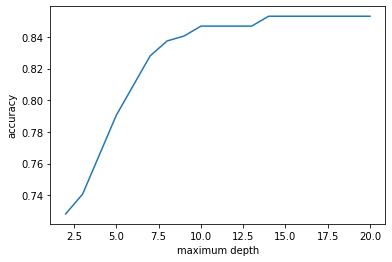

In [0]:
sns.lineplot('maximum depth', 'accuracy', data=acc_curve_gini)

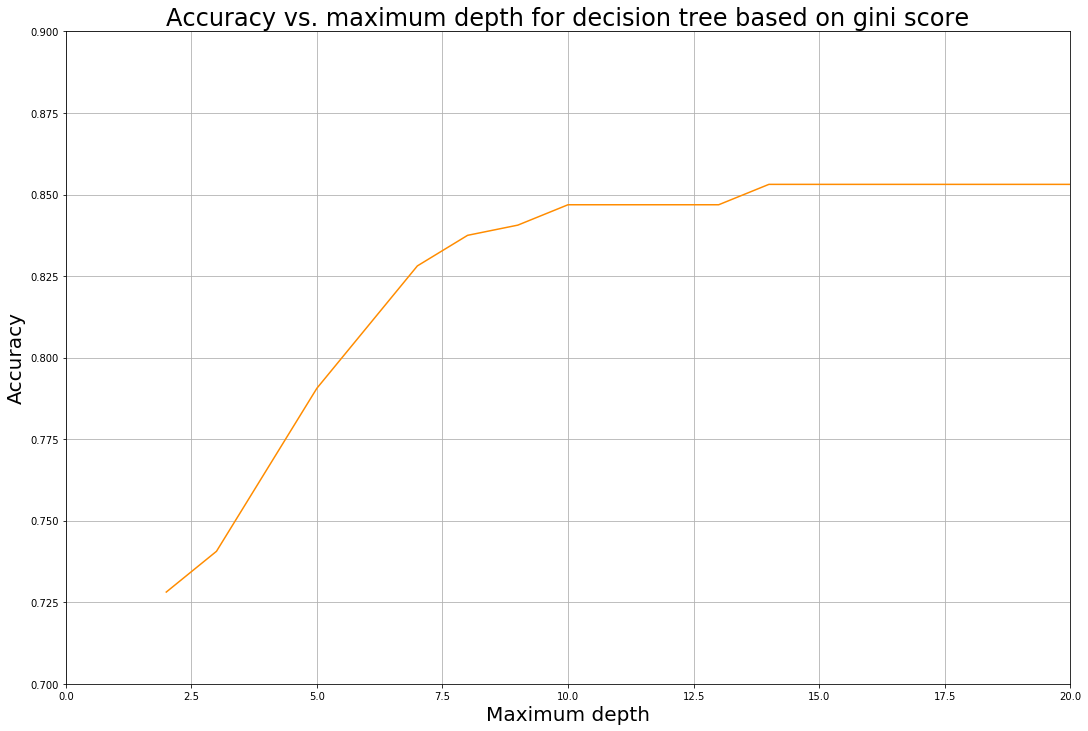

In [0]:
plt.figure(figsize=(18,12))
plt.plot(acc_curve_gini['maximum depth'], acc_curve_gini['accuracy'], color='darkorange')
#plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 20.0])
plt.ylim([0.7, 0.9])
plt.title('Accuracy vs. maximum depth for decision tree based on gini score',fontsize=24)
plt.xlabel('Maximum depth',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.grid(True)

In [0]:
Tree_gini_train=build_tree(train.values.tolist(), 8, 10)

In [0]:
pre_gini_train= pd.DataFrame(columns=['decision', 'admit', 'counter'])
i=0
for row in train.values.tolist():
    prediction = predict(Tree_gini_train, row)
    pre_gini_train.loc[i]=[prediction,row[3],1]
    i+=1

The confusion matrix for the decision tree (with gini index) for training data is:

In [0]:
out_counts_gini_train = pre_gini_train.groupby(['decision', 'admit'])['counter'].count()
out_counts_gini_train.unstack()

admit,0.0,1.0
decision,,
0.0,205,37
1.0,15,63


In [0]:
print('The decision tree accuracy (with gini index) for training data is:',(out_counts_gini_train[0][0]+out_counts_gini_train[1][1])/sum(out_counts_gini_train))

The decision tree accuracy (with gini index) for training data is: 0.8375


In [0]:
pre_gini_test= pd.DataFrame(columns=['decision', 'admit', 'counter'])
i=0
for row in test.values.tolist():
    prediction = predict(Tree_gini_train, row)
    pre_gini_test.loc[i]=[prediction,row[3],1]
    i+=1

The confusion matrix for the decision tree (with gini index) for testing data is:

In [0]:
out_counts_gini_test = pre_gini_test.groupby(['decision', 'admit'])['counter'].count()
out_counts_gini_test.unstack()

admit,0.0,1.0
decision,,
0.0,46,17
1.0,7,10


In [0]:
print('The decision tree accuracy (with gini index) for testing data is:',(out_counts_gini_test[0][0]+out_counts_gini_test[1][1])/sum(out_counts_gini_test))

The decision tree accuracy (with gini index) for testing data is: 0.7


### Now, we can make the desicion tree based on Entropy:

We need to write a function to calculate entropy index: 

Calculate the entropy index for a split dataset:

In [0]:
def entropy_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted entropy index for each group
    entropy = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            if p==0:
                a=0
            else:
                a=math.log(p,2)
            score += p * a
        # weight the group score by its relative size
        entropy += (- score) * (size / n_instances)
    return entropy

The get_split fuction should update based on entropy index:

In [0]:
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            entropy = entropy_index(groups, class_values)
            if entropy < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], entropy, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

In [0]:
def best_depth_entropy(data,max_depth):
    acc_curve = pd.DataFrame(columns=['maximum depth', 'accuracy'])
    for depth in range (2,max_depth+1):
        Tree_entropy_train=build_tree(data.values.tolist(), depth, 10)
        pre_entropy_train= pd.DataFrame(columns=['decision', 'admit', 'counter'])
        i=0
        for row in data.values.tolist():
            prediction = predict(Tree_entropy_train, row)
            pre_entropy_train.loc[i]=[prediction,row[3],1]
            i+=1
        out_counts_entropy_train = pre_entropy_train.groupby(['decision', 'admit'])['counter'].count()
        accuracy=(out_counts_entropy_train[0][0]+out_counts_entropy_train[1][1])/sum(out_counts_entropy_train)
        acc_curve.loc[depth]=[depth,accuracy]
    return acc_curve      

In [0]:
acc_curve_entropy=best_depth_entropy(train,20)

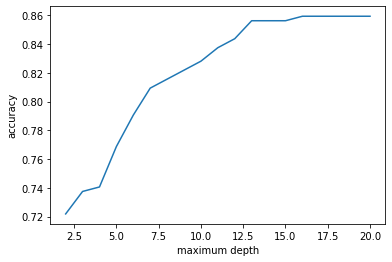

In [0]:
sns.lineplot('maximum depth', 'accuracy', data=acc_curve_entropy)

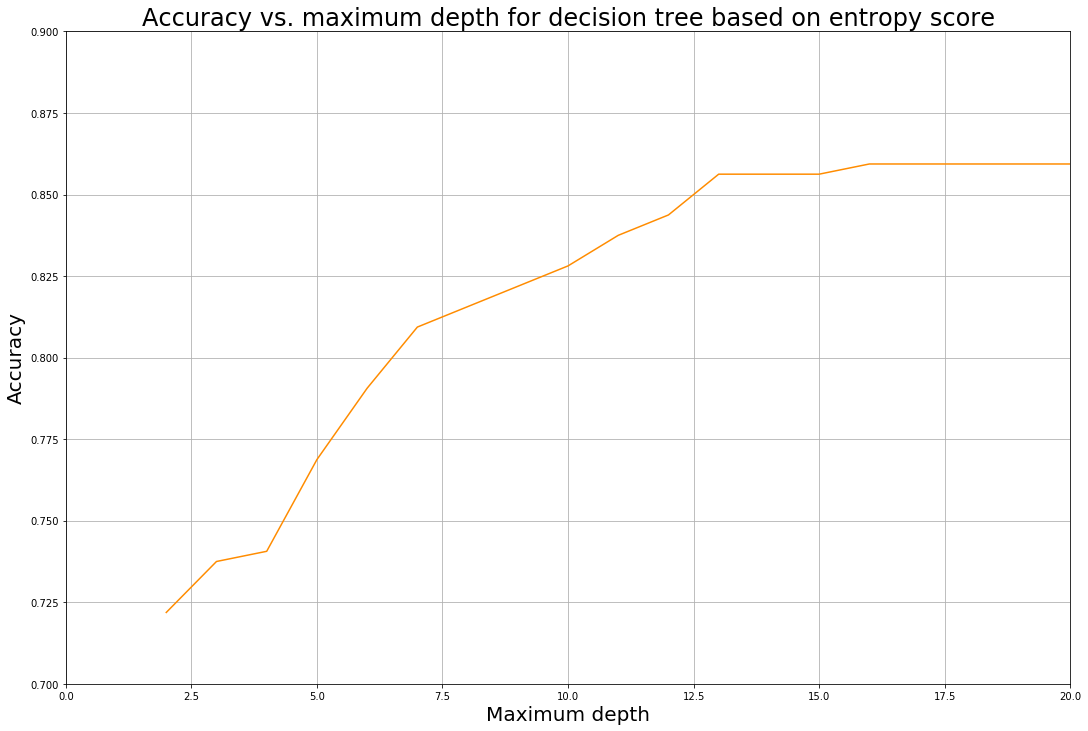

In [0]:
plt.figure(figsize=(18,12))
plt.plot(acc_curve_entropy['maximum depth'], acc_curve_entropy['accuracy'], color='darkorange')
#plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 20.0])
plt.ylim([0.7, 0.9])
plt.title('Accuracy vs. maximum depth for decision tree based on entropy score',fontsize=24)
plt.xlabel('Maximum depth',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.grid(True)

In [0]:
Tree_entropy_train=build_tree(train.values.tolist(), 6, 10)

In [0]:
pre_entropy_train= pd.DataFrame(columns=['decision', 'admit', 'counter'])
i=0
for row in train.values.tolist():
    prediction = predict(Tree_entropy_train, row)
    pre_entropy_train.loc[i]=[prediction,row[3],1]
    i+=1

The confusion matrix for the decision tree (with entropy index) for training data is:

In [0]:
out_counts_entropy_train = pre_entropy_train.groupby(['decision', 'admit'])['counter'].count()
out_counts_entropy_train.unstack()

admit,0.0,1.0
decision,,
0.0,212,59
1.0,8,41


In [0]:
print('The decision tree accuracy (with entropy index) for training data is:',(out_counts_entropy_train[0][0]+out_counts_entropy_train[1][1])/sum(out_counts_entropy_train))

The decision tree accuracy (with entropy index) for training data is: 0.790625


In [0]:
pre_entropy_test= pd.DataFrame(columns=['decision', 'admit', 'counter'])
i=0
for row in test.values.tolist():
    prediction = predict(Tree_entropy_train, row)
    pre_entropy_test.loc[i]=[prediction,row[3],1]
    i+=1

The confusion matrix for the decision tree (with entropy index) for testing data is:

In [0]:
out_counts_entropy_test = pre_entropy_test.groupby(['decision', 'admit'])['counter'].count()
out_counts_entropy_test.unstack()

admit,0.0,1.0
decision,,
0.0,49,19
1.0,4,8


In [0]:
print('The decision tree accuracy (with entropy index) for testing data is:',(out_counts_entropy_test[0][0]+out_counts_entropy_test[1][1])/sum(out_counts_entropy_test))

The decision tree accuracy (with entropy index) for testing data is: 0.7125
